In [1]:
%pylab inline

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import os
import pickle
import scipy.stats

In [65]:
figsize(12,12)
plt.rcParams.update({'font.size': 12})

In [158]:
spl_vals = {}
success_vals = {}

# listed in the same order as in "Sim2Real Predictivity: Does Evaluation in Simulation Predict Real-World Performance?" by Kadian et al.

spl_vals["reality"] = {}
spl_vals["reality"]["depth_train_sliding_off_train_noise_multiplier_0.5"]           = 0.59
spl_vals["reality"]["depth_train_sliding_off_train_noise_multiplier_1.0"]           = 0.74
spl_vals["reality"]["predicted_depth_train_sliding_off_train_noise_multiplier_0.5"] = 0.53
spl_vals["reality"]["predicted_depth_train_sliding_off_train_noise_multiplier_1.0"] = 0.66
spl_vals["reality"]["rgb_train_sliding_off_train_noise_multiplier_0.5"]             = 0.33
spl_vals["reality"]["rgb_train_sliding_off_train_noise_multiplier_1.0"]             = 0.44
spl_vals["reality"]["depth_train_sliding_on_train_noise_multiplier_0.0"]            = 0.64
spl_vals["reality"]["predicted_depth_train_sliding_on_train_noise_multiplier_0.0"]  = 0.58
spl_vals["reality"]["rgb_train_sliding_on_train_noise_multiplier_0.0"]              = 0.61

spl_vals["challenge_sim_reported"] = {}
spl_vals["challenge_sim_reported"]["depth_train_sliding_off_train_noise_multiplier_0.5"]           = 0.68
spl_vals["challenge_sim_reported"]["depth_train_sliding_off_train_noise_multiplier_1.0"]           = 0.78
spl_vals["challenge_sim_reported"]["predicted_depth_train_sliding_off_train_noise_multiplier_0.5"] = 0.54
spl_vals["challenge_sim_reported"]["predicted_depth_train_sliding_off_train_noise_multiplier_1.0"] = 0.64
spl_vals["challenge_sim_reported"]["rgb_train_sliding_off_train_noise_multiplier_0.5"]             = 0.56
spl_vals["challenge_sim_reported"]["rgb_train_sliding_off_train_noise_multiplier_1.0"]             = 0.58
spl_vals["challenge_sim_reported"]["depth_train_sliding_on_train_noise_multiplier_0.0"]            = 0.66
spl_vals["challenge_sim_reported"]["predicted_depth_train_sliding_on_train_noise_multiplier_0.0"]  = 0.56
spl_vals["challenge_sim_reported"]["rgb_train_sliding_on_train_noise_multiplier_0.0"]              = 0.62

spl_vals["test_sim_reported"] = {}
spl_vals["test_sim_reported"]["depth_train_sliding_off_train_noise_multiplier_0.5"]           = 0.59
spl_vals["test_sim_reported"]["depth_train_sliding_off_train_noise_multiplier_1.0"]           = 0.53
spl_vals["test_sim_reported"]["predicted_depth_train_sliding_off_train_noise_multiplier_0.5"] = 0.40
spl_vals["test_sim_reported"]["predicted_depth_train_sliding_off_train_noise_multiplier_1.0"] = 0.43
spl_vals["test_sim_reported"]["rgb_train_sliding_off_train_noise_multiplier_0.5"]             = 0.43
spl_vals["test_sim_reported"]["rgb_train_sliding_off_train_noise_multiplier_1.0"]             = 0.36
spl_vals["test_sim_reported"]["depth_train_sliding_on_train_noise_multiplier_0.0"]            = 0.35
spl_vals["test_sim_reported"]["predicted_depth_train_sliding_on_train_noise_multiplier_0.0"]  = 0.32
spl_vals["test_sim_reported"]["rgb_train_sliding_on_train_noise_multiplier_0.0"]              = 0.36

In [160]:
data_dir = "/Users/mroberts/code/github/interiorsim/code/experiments/srcc/data"

sim_eval_modes = ["challenge_sim", "test_sim"]
model_names = ["rgb_train_sliding_on_train_noise_multiplier_0.0",
               "rgb_train_sliding_off_train_noise_multiplier_0.5",
               "rgb_train_sliding_off_train_noise_multiplier_1.0",
               "depth_train_sliding_on_train_noise_multiplier_0.0",
               "depth_train_sliding_off_train_noise_multiplier_0.5",
               "depth_train_sliding_off_train_noise_multiplier_1.0",
               "predicted_depth_train_sliding_on_train_noise_multiplier_0.0",
               "predicted_depth_train_sliding_off_train_noise_multiplier_0.5",
               "predicted_depth_train_sliding_off_train_noise_multiplier_1.0"]

sim_name = "habitat_gibson_val"



def compute_stats(sim_eval_mode, model_name):

    pickle_file = os.path.join(data_dir, sim_name + "_" + sim_eval_mode + "_" + model_name + ".pickle")
    with open(pickle_file, "rb") as p:
        stats_episodes = pickle.load(p)

    valid = np.array([ np.isfinite(s[1]["distance_to_goal"]) for s in stats_episodes.items() ])
    
    spl = np.array([ s[1]["spl"] for s in stats_episodes.items() ])
    success = np.array([ s[1]["success"] for s in stats_episodes.items() ])

    spl = spl[valid]
    success = success[valid]

    spl = np.mean(spl)
    success = np.mean(success)

    return spl, success



for sim_eval_mode in sim_eval_modes:
    spl_vals[sim_eval_mode] = {}
    success_vals[sim_eval_mode] = {}
    for model_name in model_names:
        spl, success = compute_stats(sim_eval_mode, model_name)
        spl_vals[sim_eval_mode][model_name] = spl
        success_vals[sim_eval_mode][model_name] = success

print(spl_vals)

{'reality': {'depth_train_sliding_off_train_noise_multiplier_0.5': 0.59, 'depth_train_sliding_off_train_noise_multiplier_1.0': 0.74, 'predicted_depth_train_sliding_off_train_noise_multiplier_0.5': 0.53, 'predicted_depth_train_sliding_off_train_noise_multiplier_1.0': 0.66, 'rgb_train_sliding_off_train_noise_multiplier_0.5': 0.33, 'rgb_train_sliding_off_train_noise_multiplier_1.0': 0.44, 'depth_train_sliding_on_train_noise_multiplier_0.0': 0.64, 'predicted_depth_train_sliding_on_train_noise_multiplier_0.0': 0.58, 'rgb_train_sliding_on_train_noise_multiplier_0.0': 0.61}, 'challenge_sim_reported': {'depth_train_sliding_off_train_noise_multiplier_0.5': 0.68, 'depth_train_sliding_off_train_noise_multiplier_1.0': 0.78, 'predicted_depth_train_sliding_off_train_noise_multiplier_0.5': 0.54, 'predicted_depth_train_sliding_off_train_noise_multiplier_1.0': 0.64, 'rgb_train_sliding_off_train_noise_multiplier_0.5': 0.56, 'rgb_train_sliding_off_train_noise_multiplier_1.0': 0.58, 'depth_train_sliding_o

r = 0.9651589665266348


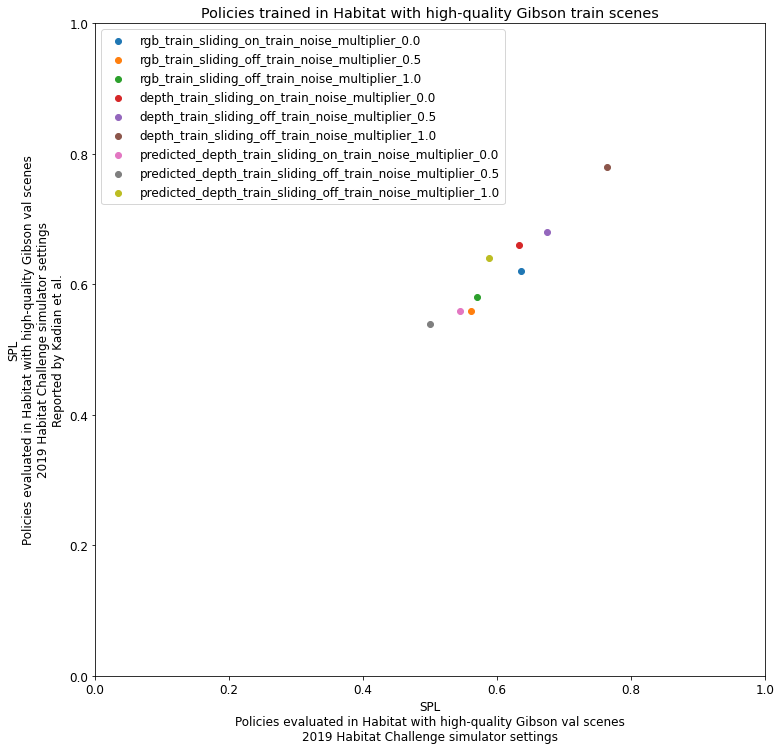

In [161]:
x = []
y = []
for model_name in model_names:
    x.append(spl_vals["challenge_sim"][model_name])
    y.append(spl_vals["challenge_sim_reported"][model_name])    
    scatter(spl_vals["challenge_sim"][model_name], spl_vals["challenge_sim_reported"][model_name], label=model_name)

r, p_val = scipy.stats.pearsonr(x, y)
print("r =", r)

title("Policies trained in Habitat with high-quality Gibson train scenes");
xlabel("SPL\nPolicies evaluated in Habitat with high-quality Gibson val scenes\n2019 Habitat Challenge simulator settings");
ylabel("SPL\nPolicies evaluated in Habitat with high-quality Gibson val scenes\n2019 Habitat Challenge simulator settings\nReported by Kadian et al.");
ylim(0,1);
xlim(0,1);
legend();

r = 0.874672298237194


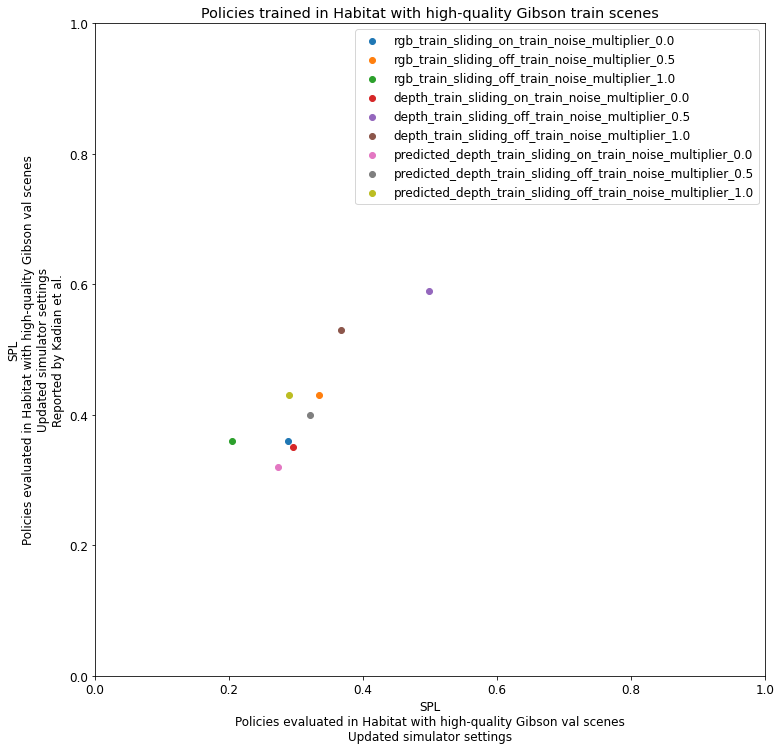

In [162]:
x = []
y = []
for model_name in model_names:
    x.append(spl_vals["test_sim"][model_name])
    y.append(spl_vals["test_sim_reported"][model_name])    
    scatter(spl_vals["test_sim"][model_name], spl_vals["test_sim_reported"][model_name], label=model_name)

r, p_val = scipy.stats.pearsonr(x, y)
print("r =", r)

title("Policies trained in Habitat with high-quality Gibson train scenes");
xlabel("SPL\nPolicies evaluated in Habitat with high-quality Gibson val scenes\nUpdated simulator settings");
ylabel("SPL\nPolicies evaluated in Habitat with high-quality Gibson val scenes\nUpdated simulator settings\nReported by Kadian et al.");
ylim(0,1);
xlim(0,1);
legend();

r = 0.6314968310270521


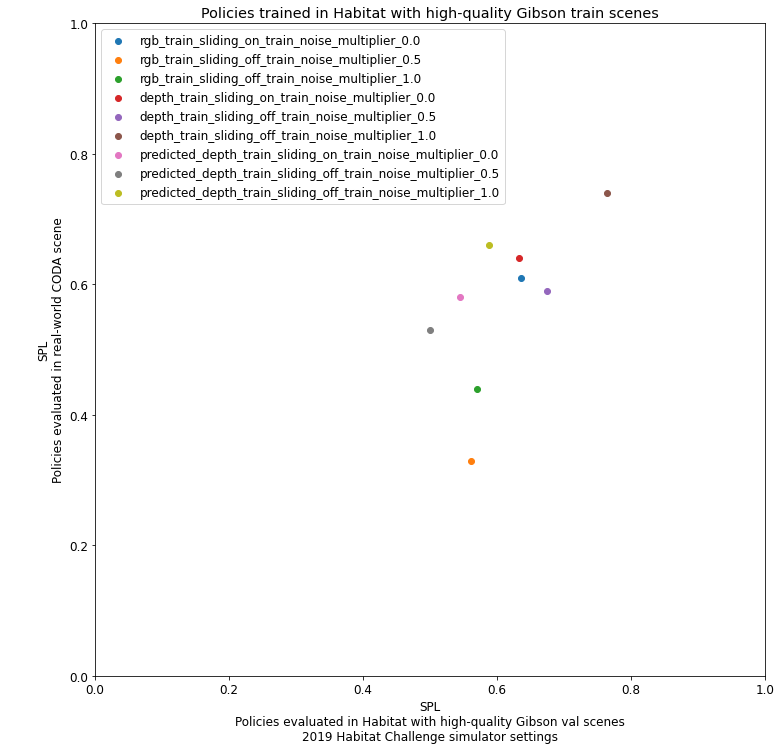

In [163]:
x = []
y = []
for model_name in model_names:
    x.append(spl_vals["challenge_sim"][model_name])
    y.append(spl_vals["reality"][model_name])    
    scatter(spl_vals["challenge_sim"][model_name], spl_vals["reality"][model_name], label=model_name)

r, p_val = scipy.stats.pearsonr(x, y)
print("r =", r)

title("Policies trained in Habitat with high-quality Gibson train scenes");
xlabel("SPL\nPolicies evaluated in Habitat with high-quality Gibson val scenes\n2019 Habitat Challenge simulator settings");
ylabel("\n\nSPL\nPolicies evaluated in real-world CODA scene");
ylim(0,1);
xlim(0,1);
legend();

r = 0.21552588589707233


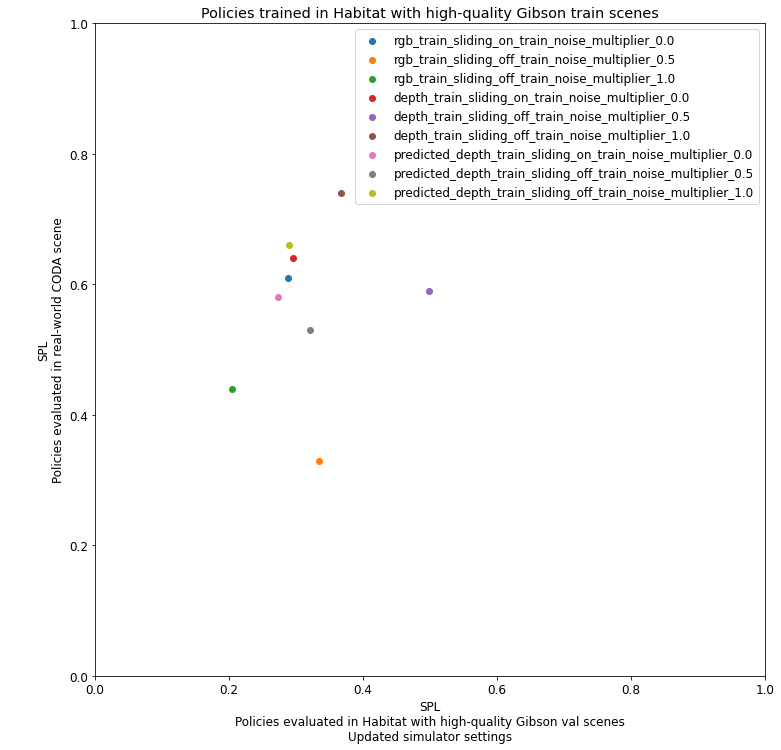

In [164]:
x = []
y = []
for model_name in model_names:
    x.append(spl_vals["test_sim"][model_name])
    y.append(spl_vals["reality"][model_name])    
    scatter(spl_vals["test_sim"][model_name], spl_vals["reality"][model_name], label=model_name)

r, p_val = scipy.stats.pearsonr(x, y)
print("r =", r)

title("Policies trained in Habitat with high-quality Gibson train scenes");
xlabel("SPL\nPolicies evaluated in Habitat with high-quality Gibson val scenes\nUpdated simulator settings");
ylabel("\n\nSPL\nPolicies evaluated in real-world CODA scene");
ylim(0,1);
xlim(0,1);
legend();

r = 0.9202703985393353


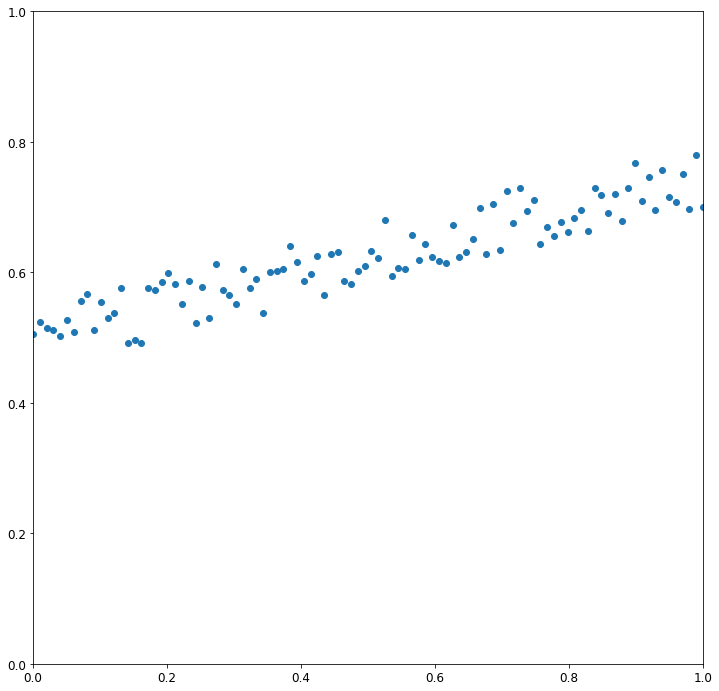

In [165]:
x         = linspace(0.0, 1.0, 100)
noise_mag = 0.1

np.random.seed(0)
noise = noise_mag*(np.random.rand(*x.shape)-0.5)

a = 0.25
b = 0.5
y = a*x + b + noise

r, p_val = scipy.stats.pearsonr(x, y)
print("r =", r)

scatter(x,y);
ylim(0,1);
xlim(0,1);